Ques 1

1A

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Enter Ip: 30
Enter Ep: 50
Enter x: 100
Maximum Radial Stress=50.0 at r=1600.0
Maximum Circumferential Stress=360.32258064516134 at r=1500.0
Maximum Longitudinal Stress=117.0967741935484 at r=1500.0


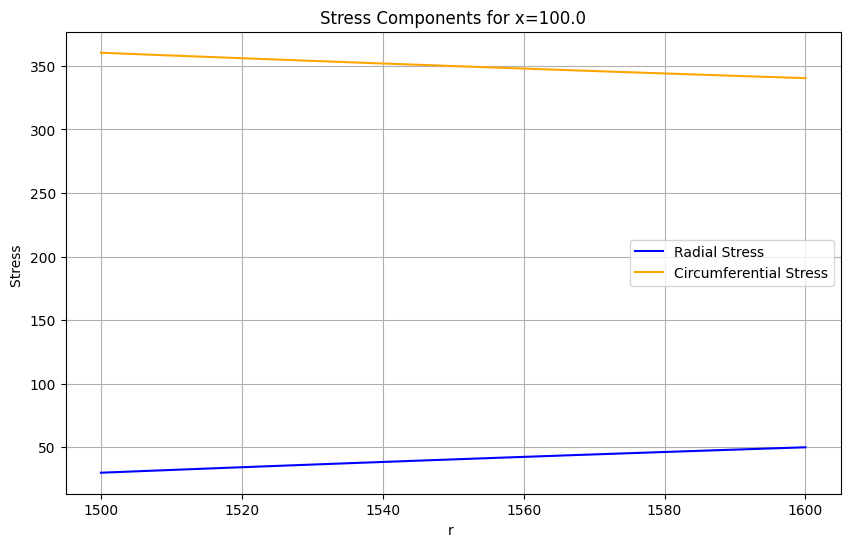

For x=100.0:
At r=1500.0: Radial Stress=29.99999999999997, Circumferential Stress=360.32258064516134, Longitudinal Stress=117.0967741935484
At r=1501.010101010101: Radial Stress=30.222214963503404, Circumferential Stress=360.1003656816579, Longitudinal Stress=117.09677419354838
At r=1502.020202020202: Radial Stress=30.44398176244212, Circumferential Stress=359.8785988827192, Longitudinal Stress=117.0967741935484
At r=1503.030303030303: Radial Stress=30.66530160115471, Circumferential Stress=359.6572790440066, Longitudinal Stress=117.0967741935484
At r=1504.040404040404: Radial Stress=30.886175679936855, Circumferential Stress=359.4364049652244, Longitudinal Stress=117.09677419354838
At r=1505.050505050505: Radial Stress=31.10660519505805, Circumferential Stress=359.2159754501032, Longitudinal Stress=117.09677419354836
At r=1506.060606060606: Radial Stress=31.326591338777092, Circumferential Stress=358.9959893063842, Longitudinal Stress=117.0967741935484
At r=1507.0707070707072: Radial 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def radial_stress(Ip, Ep, x, r):
    ri = 1500
    ro = ri + x
    A = (Ip * ri**2 - Ep * ro**2) / (ro**2 - ri**2)
    B = ((Ip - Ep) * (ri**2 * ro**2)) / (ro**2 - ri**2)
    return abs(A - (B / (r**2)))

def circumferential_stress(Ip, Ep, x, r):
    ri = 1500
    ro = ri + x
    A = (Ip * ri**2 - Ep * ro**2) / (ro**2 - ri**2)
    B = ((Ip - Ep) * (ri**2 * ro**2)) / (ro**2 - ri**2)
    return abs(A + (B / (r**2)))

def find_max_stress(stress_values, r_values):
    max_stress = max(stress_values)
    max_index = stress_values.index(max_stress)
    return max_stress, r_values[max_index]

def Longitudinal_stress(radial_stress, circumferential_stress, v):
    Sz = abs(v * (radial_stress + circumferential_stress))  # Absolute value since Sz is negative
    return Sz

Ip = float(input("Enter Ip: "))

if Ip > 30:
    print("Invalid pressure")
else:
    Ep = float(input("Enter Ep: "))
    x = float(input("Enter x: "))
    x_values = [x]
    ri = 1500
    v = 0.3

    for x in x_values:
        r_values = np.linspace(ri, ri + x, 100)
        radial_stress_values = [radial_stress(Ip, Ep, x, r) for r in r_values]
        circumferential_stress_values = [circumferential_stress(Ip, Ep, x, r) for r in r_values]

        max_radial_stress, r_max_radial = find_max_stress(radial_stress_values, r_values)
        max_circumferential_stress, r_max_circumferential = find_max_stress(circumferential_stress_values, r_values)
        print(f"Maximum Radial Stress={max_radial_stress} at r={r_max_radial}")
        print(f"Maximum Circumferential Stress={max_circumferential_stress} at r={r_max_circumferential}")

        Sz_values = [Longitudinal_stress(radial, circumferential, v) for radial, circumferential in zip(radial_stress_values, circumferential_stress_values)]
        max_Sz, r_max_Sz = find_max_stress(Sz_values, r_values)
        print(f"Maximum Longitudinal Stress={max_Sz} at r={r_max_Sz}")

        # Plotting
        plt.figure(figsize=(10, 6))

        # Normalize stress values by Ep
        normalized_r_values = [r  for r in r_values]
        normalized_radial_stress_values = [stress for stress in radial_stress_values]
        normalized_circumferential_stress_values = [stress  for stress in circumferential_stress_values]

        plt.plot(normalized_r_values, normalized_radial_stress_values, label='Radial Stress', color='blue')
        plt.plot(normalized_r_values, normalized_circumferential_stress_values, label='Circumferential Stress', color='orange')
        plt.xlabel('r ')

        plt.ylabel('Stress ')
        plt.title(f'Stress Components for x={x}')
        plt.legend()
        plt.grid(True)
        plt.show()

        # Print values of radial, circumferential, and longitudinal stress for each r
        print(f"For x={x}:")
        for i in range(len(r_values)):
            print(f"At r={r_values[i]}: Radial Stress={radial_stress_values[i]}, Circumferential Stress={circumferential_stress_values[i]}, Longitudinal Stress={Sz_values[i]}")




1b

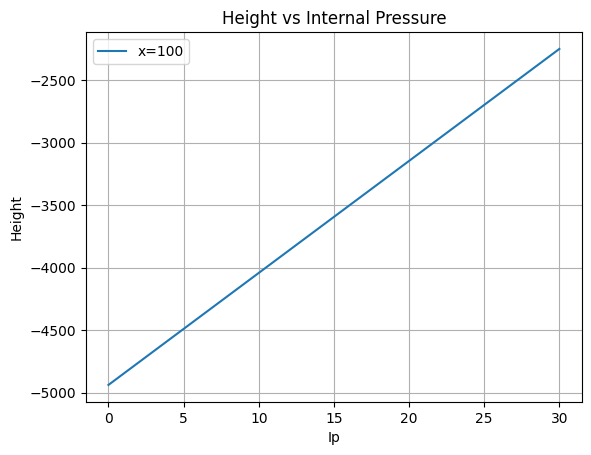

For x=100, the maximum absolute height value is 4937.56371049949 at Ip=0.0 and ro=1600


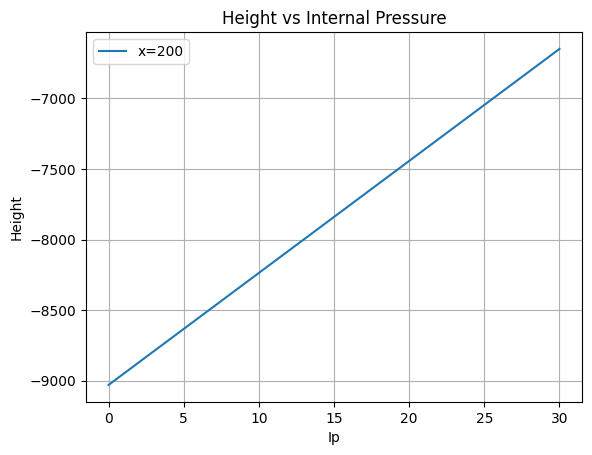

For x=200, the maximum absolute height value is 9029.695706309147 at Ip=0.0 and ro=1700


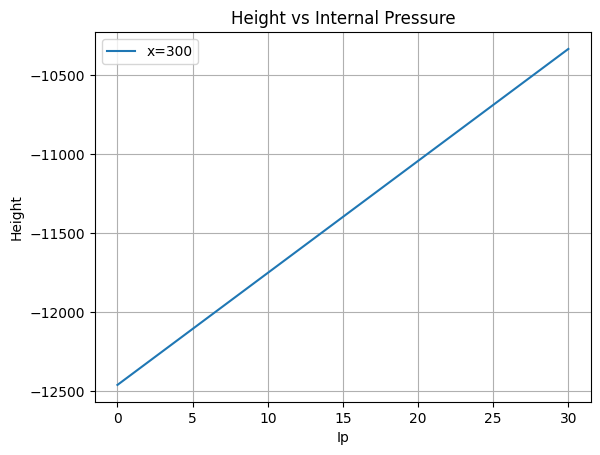

For x=300, the maximum absolute height value is 12458.942122550685 at Ip=0.0 and ro=1800


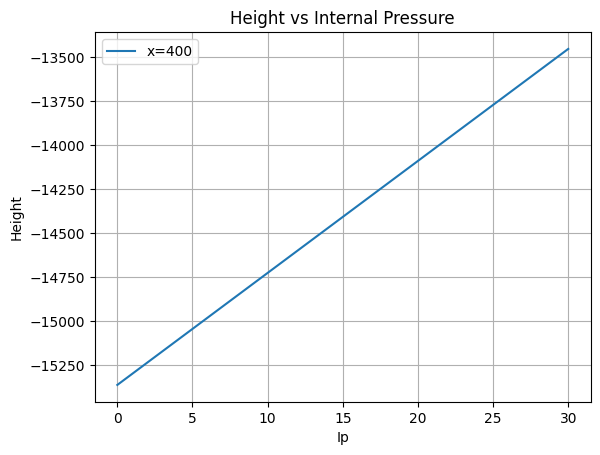

For x=400, the maximum absolute height value is 15361.113228911647 at Ip=0.0 and ro=1900


In [3]:
import numpy as np
import matplotlib.pyplot as plt

def height(Ip, x):
    ri = 1500
    ro = ri + x
    numerator = ((400 + Ip) * (ri**2) - 400 * (ro**2))
    denominator = (9.81 * 1000) * (ro**2)
    return ((numerator / denominator)*1000000), ro

Ip_values = np.linspace(0, 30, 100)
x_values = [100, 200, 300, 400]


for x in x_values:
    height_values = [height(Ip, x) for Ip in Ip_values]

    h_values, ro_values = zip(*height_values)

    plt.plot(Ip_values, h_values, label=f'x={x}')
    plt.xlabel('Ip')
    plt.ylabel('Height')
    plt.title('Height vs Internal Pressure')
    plt.grid(True)
    plt.legend()
    plt.show()

    # Find the index of the maximum absolute height value
    max_index = max(range(len(h_values)), key=lambda i: abs(h_values[i]))
    max_h_abs = abs(h_values[max_index])
    max_Ip = Ip_values[max_index]
    max_ro = ro_values[max_index]

    print(f"For x={x}, the maximum absolute height value is {max_h_abs} at Ip={max_Ip} and ro={max_ro}")


Ques 2


2A

Enter lack of fit(in m): .005
Enter Ip: 30
Enter Ep: 50
Enter x: 100
Maximum Radial Stress=50.0 at r=1700.0
Maximum Circumferential Stress=210.947265625 at r=1500.0
Maximum Longitudinal Stress=-72.0966796875 at r=1601.010101010101


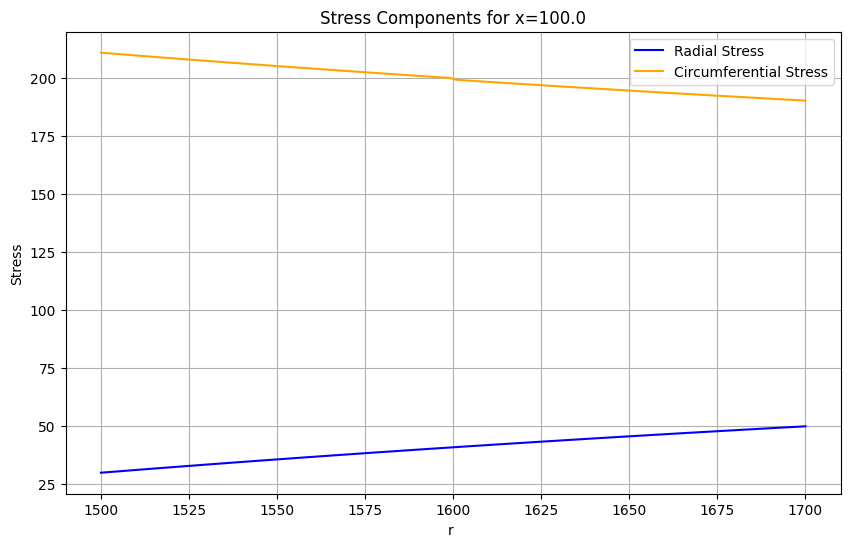

For x=100.0:
40.95579147338867
At r=1500.0: Radial Stress=30.0, Circumferential Stress=210.947265625, Longitudinal Stress=72.2841796875
At r=1502.020202020202: Radial Stress=30.24320858036519, Circumferential Stress=210.7040570446348, Longitudinal Stress=72.2841796875
At r=1504.040404040404: Radial Stress=30.485437797908844, Circumferential Stress=210.46182782709116, Longitudinal Stress=72.2841796875
At r=1506.060606060606: Radial Stress=30.726692903902276, Circumferential Stress=210.2205727210977, Longitudinal Stress=72.2841796875
At r=1508.080808080808: Radial Stress=30.966979114467662, Circumferential Stress=209.98028651053232, Longitudinal Stress=72.2841796875
At r=1510.1010101010102: Radial Stress=31.206301610860066, Circumferential Stress=209.74096401413993, Longitudinal Stress=72.2841796875
At r=1512.121212121212: Radial Stress=31.444665539746822, Circumferential Stress=209.50260008525316, Longitudinal Stress=72.2841796875
At r=1514.141414141414: Radial Stress=31.682076013484192

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def Junction_radial_stress(Ip, Ep, x, s):

    E = 200 * 1e3
    ri = 1500
    rc = ri + x
    ro = ri + 2 * x
    a = s * E / rc   #s is lack of fit
    b = ro**2 - rc**2
    c = rc**2 - ri**2
    d = ro**2 - ri**2


    Pc = (a * b * c + 2 * Ep * ro**2 * c + 2 * Ip * ri**2 * b) / (2 * rc**2 * d)


    return Pc

def radial_stress(Ip, Ep, x, r):
    ri = 1500
    rc = ri + x
    ro = ri + 2 * x
    ro = rc if ri <= r <= rc else ri + 2 * x
    ri = rc if rc+1 <= r <= ro else ri
    Pc= Junction_radial_stress(Ip, Ep, x,s)
    if ri <= r <= rc:
        Ep = Pc
    elif rc < r <= ro:
        Ip = Pc
    A = (Ip * ri**2 - Ep * ro**2) / (ro**2 - ri**2)
    B = ((Ip - Ep) * (ri**2 * ro**2)) / (ro**2 - ri**2)
    return abs(A - (B / (r**2))) if r <= ro else None

def circumferential_stress(Ip, Ep, x, r):
    ri = 1500
    rc = ri + x
    ro = ri + 2 * x
    ro = rc if ri <= r <= rc else ri + 2 * x
    ri = rc if rc+1 <= r <= ro else ri
    Pc= Junction_radial_stress(Ip, Ep, x,s)

    if ri <= r <= rc:
        Ep = Pc
        Ip=Ip

    elif rc < r <= ro:
        Ip = Pc
    A = (Ip * ri**2 - Ep * ro**2) / (ro**2 - ri**2)
    B = ((Ip - Ep) * (ri**2 * ro**2)) / (ro**2 - ri**2)
    return abs(A + (B / (r**2))) if r <= ro else None

def find_max_stress(stress_values, r_values):
    max_stress = max(stress_values)
    max_index = stress_values.index(max_stress)
    return max_stress, r_values[max_index]

def Longitudinal_stress(radial_stress, circumferential_stress, v):
    Sz = - (v * (radial_stress + circumferential_stress))  # Sz is negative since both radial and circumferential stresses are negative
    return Sz
s = float(input("Enter lack of fit(in m): "))
Ip = float(input("Enter Ip: "))

if Ip > 30:
    print("Invalid pressure")
else:
    Ep = float(input("Enter Ep: "))
    x= float(input("Enter x: "))
    x_values = [x]
    ri = 1500
    v = 0.3

    for x in x_values:
        Pc= Junction_radial_stress(Ip, Ep, x,s)
        r_values = np.linspace(ri, ri + 2 * x, 100)
        # Filter out values of r greater than ro
        r_values = [r for r in r_values if r <= ri + 2 * x]

        radial_stress_values = [radial_stress(Ip, Ep, x, r) for r in r_values]
        circumferential_stress_values = [circumferential_stress(Ip, Ep, x, r) for r in r_values]

        max_radial_stress, r_max_radial = find_max_stress(radial_stress_values, r_values)
        max_circumferential_stress, r_max_circumferential = find_max_stress(circumferential_stress_values, r_values)

        print(f"Maximum Radial Stress={max_radial_stress} at r={r_max_radial}")
        print(f"Maximum Circumferential Stress={max_circumferential_stress} at r={r_max_circumferential}")

        Sz_values = [Longitudinal_stress(radial, circumferential, v) for radial, circumferential in
                     zip(radial_stress_values, circumferential_stress_values)]
        max_Sz, r_max_Sz = find_max_stress(Sz_values, r_values)
        print(f"Maximum Longitudinal Stress={max_Sz} at r={r_max_Sz}")

        # Plotting
        plt.figure(figsize=(10, 6))

        # Normalize stress values by Ep
        normalized_r_values = [r  for r in r_values]
        normalized_radial_stress_values = [stress for stress in radial_stress_values]
        normalized_circumferential_stress_values = [stress  for stress in circumferential_stress_values]

        plt.plot(normalized_r_values, normalized_radial_stress_values, label='Radial Stress', color='blue')
        plt.plot(normalized_r_values, normalized_circumferential_stress_values, label='Circumferential Stress', color='orange')
        plt.xlabel('r ')
        plt.ylabel('Stress')
        plt.title(f'Stress Components for x={x}')
        plt.legend()
        plt.grid(True)
        plt.show()

        print(f"For x={x}:")
        print(Pc)
        for i in range(len(r_values)):
            print(
                f"At r={r_values[i]}: Radial Stress={radial_stress_values[i]}, Circumferential Stress={circumferential_stress_values[i]}, Longitudinal Stress={-Sz_values[i]}")
        print(f"For x={x}:")
        print(f"At ri={ri}: Radial Stress={radial_stress(Ip, Ep, x, ri)}, Circumferential Stress={circumferential_stress(Ip, Ep, x, ri)}")
        print(f"At ro={ri + 2 * x}: Radial Stress={radial_stress(Ip, Ep, x, ri + 2 * x)}, Circumferential Stress={circumferential_stress(Ip, Ep, x, ri + 2 * x)}")
        print(f"At rc={ri + x}: Radial Stress={radial_stress(Ip, Ep, x, ri + x)}, Circumferential Stress={circumferential_stress(Ip, Ep, x, ri + x)}")
        print(f"At rc+1={ri + x + 1}: Radial Stress={radial_stress(Ip, Ep, x, ri + x + 1)}, Circumferential Stress={circumferential_stress(Ip, Ep, x, ri + x + 1)}")



In [5]:
import numpy as np
import matplotlib.pyplot as plt

def height(Ip, x):
    ri = 1500
    ro = ri + 2*x
    numerator = ((400 + Ip) * (ri**2) - 400 * (ro**2))
    denominator = (9.81 * 1000) * (ro**2)
    return ((numerator / denominator)*1000000), ro

Ip_values = np.linspace(0, 30, 100)
x_values = [100]

for x in x_values:
    height_values = [height(Ip, x) for Ip in Ip_values]

    h1_values, ro_values = zip(*height_values)



    # Find the index of the maximum absolute height value
    max_index = max(range(len(h1_values)), key=lambda i: abs(h1_values[i]))
    max_h_abs = abs(h1_values[max_index])
    max_Ip = Ip_values[max_index]
    max_ro = ro_values[max_index]

    print(f"For x={x}, the maximum absolute height value is {max_h_abs} at Ip={max_Ip} and ro={max_ro}")

For x=100, the maximum absolute height value is 9029.695706309147 at Ip=0.0 and ro=1700


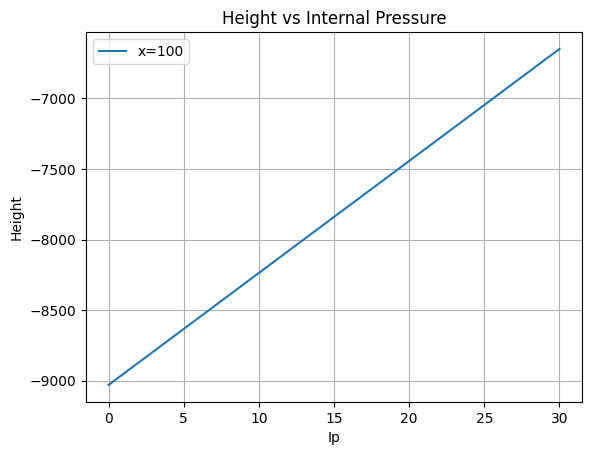

In [6]:
    plt.plot(Ip_values, h1_values, label=f'x={x}')
    plt.xlabel('Ip')
    plt.ylabel('Height')
    plt.title('Height vs Internal Pressure')
    plt.grid(True)
    plt.legend()
    plt.show()